# Assignment 2: The CIFAR-10 dataset

Name: Pratik Naik <br>
Course: Introduction to Deep Learning (CS672) <br>
CRN: 23203 <br>
Term: Spring 2025

## Importing Libraries

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import random

## Load CIFAR-10 dataset

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [41]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


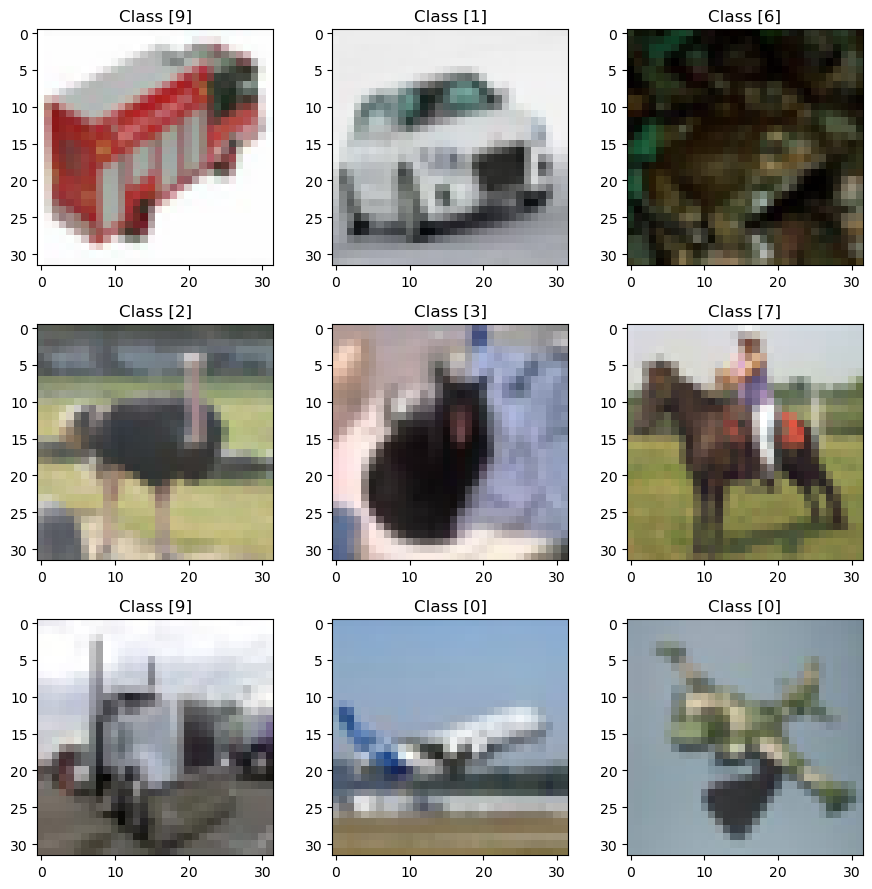

In [49]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

## Normalize the images to range [0,1]

In [13]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Data Augmentation

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

## Build CNN Model

In [19]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [25]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2716 - loss: 1.9496 - val_accuracy: 0.4831 - val_loss: 1.4034
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4496 - loss: 1.5263 - val_accuracy: 0.5171 - val_loss: 1.3302
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5006 - loss: 1.3950 - val_accuracy: 0.5573 - val_loss: 1.2392
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5395 - loss: 1.3053 - val_accuracy: 0.5781 - val_loss: 1.1832
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5625 - loss: 1.2495 - val_accuracy: 0.6201 - val_loss: 1.0927
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5810 - loss: 1.2048 - val_accuracy: 0.6346 - val_loss: 1.0450
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5879 - loss: 1.1811 - val_accuracy: 0.6253 - val_loss: 1.0612
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6018 -

## Evaluate the model

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6598 - loss: 0.9792
Test accuracy: 0.6617


## Generate predictions

In [68]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 


## Compute confusion matrix

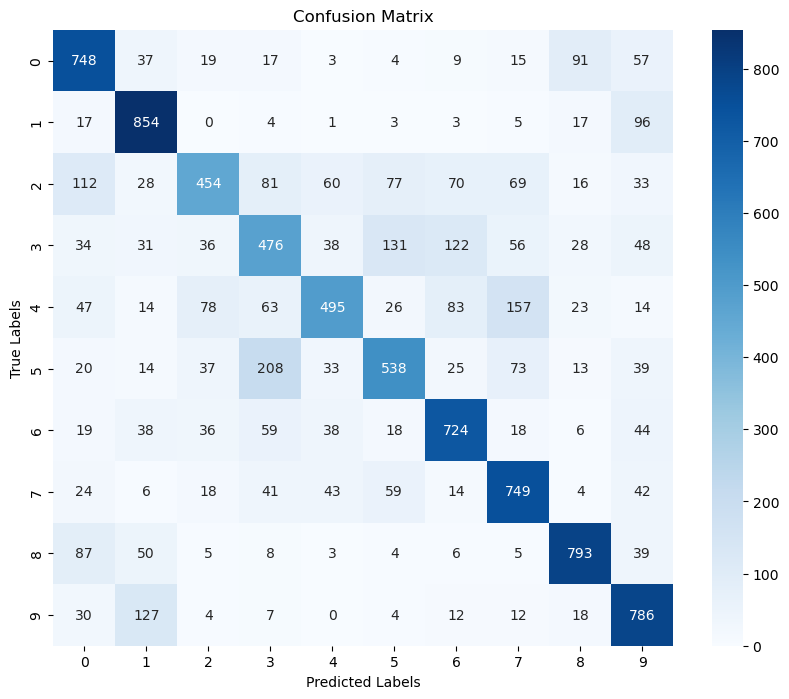

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Classification report

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1000
           1       0.71      0.85      0.78      1000
           2       0.66      0.45      0.54      1000
           3       0.49      0.48      0.48      1000
           4       0.69      0.49      0.58      1000
           5       0.62      0.54      0.58      1000
           6       0.68      0.72      0.70      1000
           7       0.65      0.75      0.69      1000
           8       0.79      0.79      0.79      1000
           9       0.66      0.79      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



## Inspecting output

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 


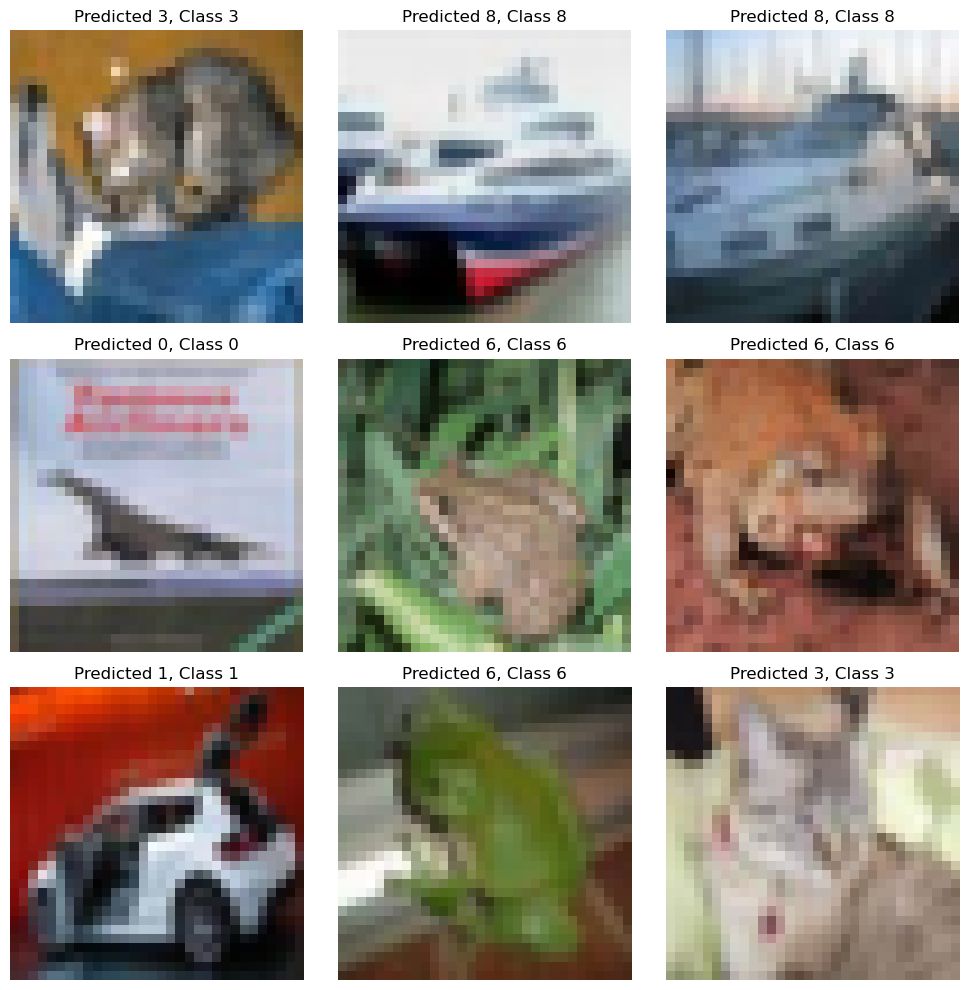

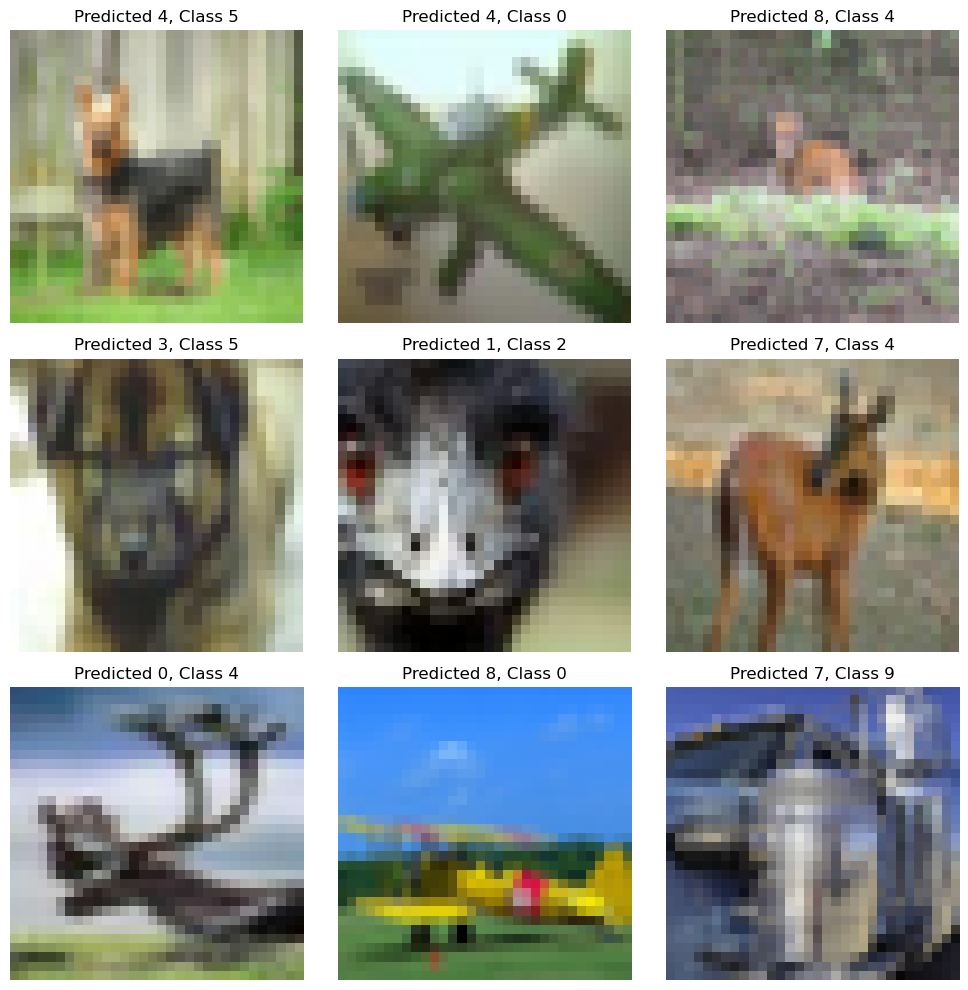

In [86]:
predicted_probabilities = model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

correct_indices = np.nonzero(predicted_classes == y_test.reshape(-1))[0]
incorrect_indices = np.nonzero(predicted_classes != y_test.reshape(-1))[0]

plt.figure(figsize=(10, 10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[correct])
    plt.title(f"Predicted {predicted_classes[correct]}, Class {y_test[correct][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[incorrect])
    plt.title(f"Predicted {predicted_classes[incorrect]}, Class {y_test[incorrect][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Plot training history

Text(0.5, 1.0, 'Training and Validation Accuracy')

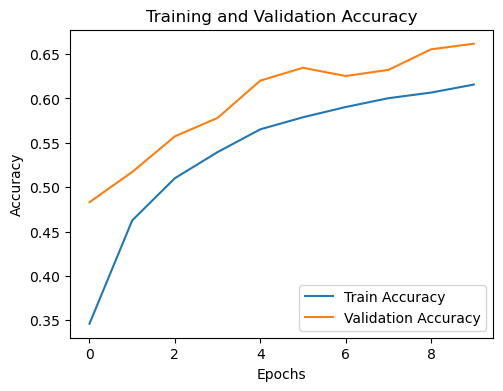

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

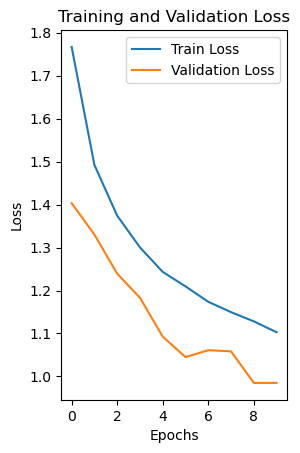

In [35]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()